# Programa Nº 1:

-----

## WordCloud Exploration

1. WordCloud I<br />
    1.1. Preprocesamiento y Procesamiento<br />
        - Preprocesamiento: Feature extracción, ajuste del content en su conjunto, tokenización<br />
        - Procesamiento: Implementación de filtros para la limpieza y filtros para la selección de muestras<br />
    1.2. Tratamiento y Generación de WordCloud<br />
        - Tratamiento: Aplicación de stop_words por medio de modelo IA (spacy)<br />
        - Generación WC: Uno para la feature "content_wc" y otro para la feature "token_wc"<br />
    1.3 Agregación:<br />
        - Agregación en el sentido de la estructura de datos, el programa recibe un fichero con extensión<br />
            ".csv" y devuelve una lista Python, el primer elemento es "dataframes" y el segundo "wordcloud_storage"<br />
        - dataframes: Es un diccionario Python, en su interior hay 1 pandas.DataFrame por cada filtro booleano<br />
            se haya implementado. Por default no hay filtros booleanos implementados, por lo tanto el diccionario<br />
            tendría la siguiente forma ```{'csv_filename': [pd.DataFrame(...)]}``` con todo el contenido del batch.<br />
        - wordcloud_storage: Es un diccionario Python, en su interior posee las instancias de clase del objeto tipo<br />
            WordCloud de la librería wordcloud. La App utiliza dos features, "content_wc", y "token_wc", por lo tanto,<br />
            siguiendo con el ejemplo de no aplicar ningún filtro booleano, el segundo elemento de la lista de agregación<br />
            sería así ```{'csv_filename': [ [WC_content, WC_token] ] }```.<br />
        - El output del set de aplicaciones resulta entonces, ```result = [{...}, {...}]``` - el primer diccionario es<br />
            dataframes, y el segundo wordcloud_storage<br />
    1.4 Outputs:<br />
        - El programa fue pensado para obtener un primer approach a lo que el contenido refleja en su conjunto<br />
        - Optimizar la extracción de muestras por medio de multi-hilos, durante el proceso de stop_words<br />
        - wordcloud.WordCloud permite obtener imágenes, texto, y campos vectoriales por medio de la implementación<br />
            de sus métodos internos, to_image(), to_svg(), to_array(), respectivamente.<br />
        - Brindar al usuario flexibilidad en los outputs, por medio de implementación de máscaras, filtros de palabras,<br />
            configuraciónes preseteadas, y demás.<br />
        - Un resplado en .txt de la última configuración utilizada para cada máscara.<br />

2. Clasificación de Sentimiento y Emociones<br />
    2.1 Prepocesamiento y Procesamiento<br />
        - Preprocesamiento: Feature extracción, ajuste del content en su conjunto, tokenización<br />
        - Procesamiento: Time Series adjustment, agregación de variables temporales<br />
    2.2 Transformers:<br />
        - Multiprocesos: Paralelización los modelos de Emociones<br />
        - Sentimiento: 3 modelos M1_I, M1_II, y M1_III<br />
            + M1_I: Optimización por multihilos, sub-batches secuenciales<br />
            + M1_II: Ingesta por Data Streaming mediante Python Generators<br />
            + M1_III: Ingesta por Data Streaming mediante Python Generators<br />
        - Emociones: 2 modelos M2, y M3<br />
            + M2: Ingesta por Data Streaming mediante Python Generators<br />
            + M3: Ingesta por Data Streaming mediante Python Generators<br />
    2.3 Analíticas:<br />
        - Gráficos: Línea de tiempo, Gráficos Radiales, Gráficos de Barras<br />
        - Outputs: Ficheros .csv y .txt con resumen descriptivo<br />

3. WordCloud II:<br />
    3.1 Lectura de clasificaciones<br />
        - Definir filtros booleanos para cada muestra<br />
    3.2 Tratamiento y Generación de WordCloud<br />
        - Tratamiento: Extracción con filtros, implementación de multi-hilos para stop_words<br />
        - Generación WC: Una lista por cada muestra y un objeto por cada feature.<br />
    3.3 Agregación:<br />
    3.4 Outputs<br />


4. Identificación de Tópicos: es otra notebook que creo que se llama Lotto.
            M4: Optimización por multihilos, sub-batches paralelos


In [1]:
filename = "octubre-untitled.csv"
filename = "tw-cholula-sofia"

import multiprocessing as mp
import random
import pandas as pd
from tools.feed import procesar_file_csv
from app.main import data_feed
from app.wordcloud_app import main_df
from app.transformer_models import main_transformers


nombre, archivo = procesar_file_csv(filename)
df = data_feed.main(archivo)
df.name = nombre
dataframes, wc_storage = main_df(df)

Tokenizando: 199it [00:00, 11715.11it/s]
100%|██████████| 125/125 [00:00<00:00, 174.35it/s]


Implementando configuración con Máscara: c:\Users\Agustin\Proyectos 2023\Noviembre\sweet_cotton\word_cloud_config\mascaras_png\rectangulo.png
app.word_cloud.output_analysis ended succesfully!
app.word_cloud.WordCloud ended succesfully.


# WordCloud I

WordCloud del content


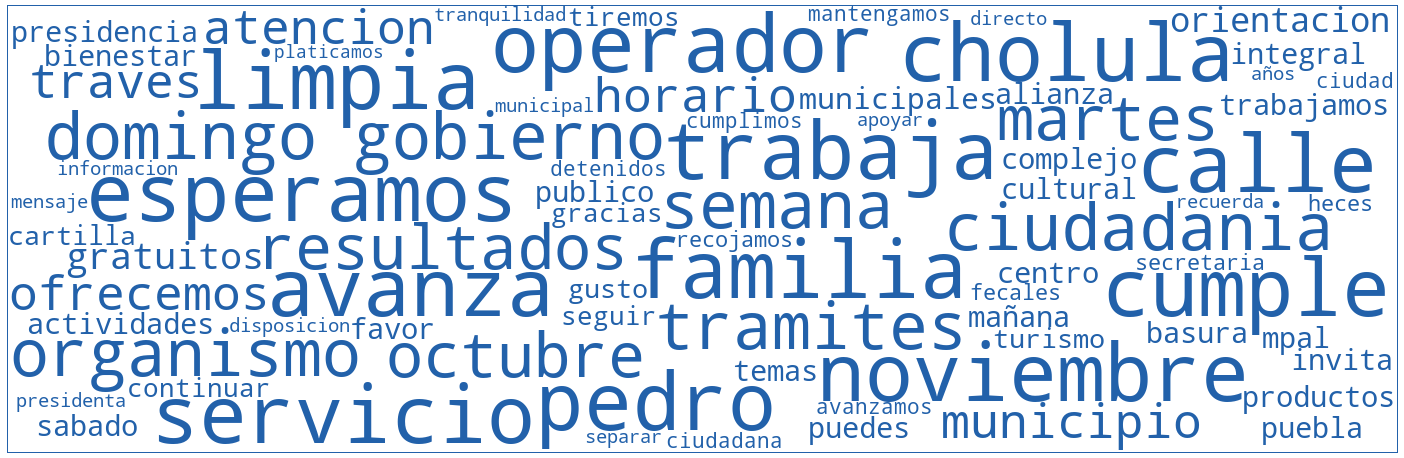

In [2]:
print("WordCloud del content")
wc_storage[0][0].to_image()

WordCloud de los tokens


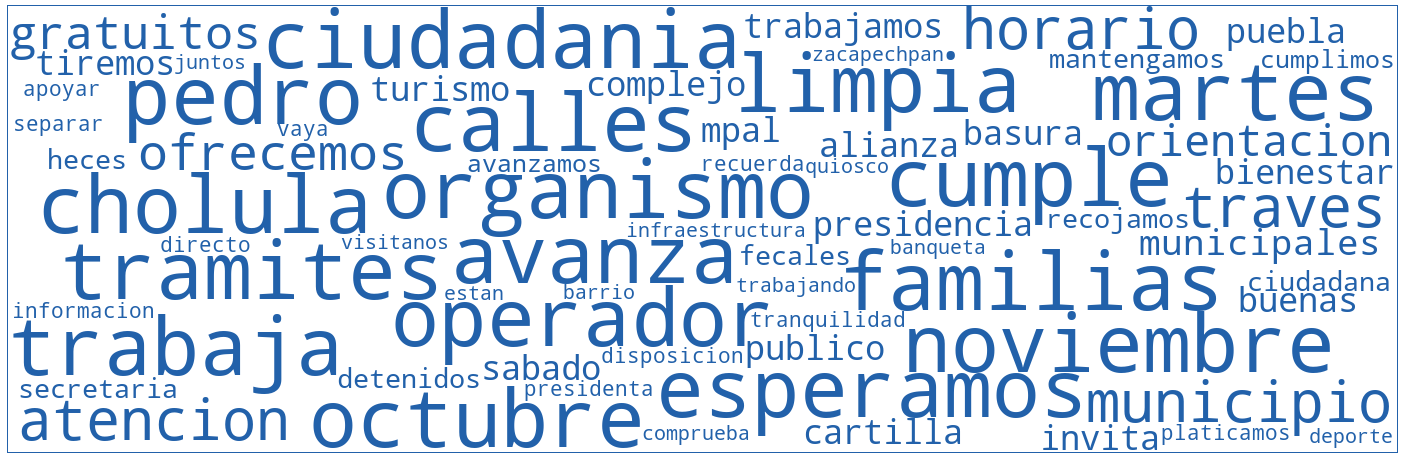

In [3]:
print("WordCloud de los tokens")
wc_storage[0][1].to_image()

# Clasificación de Sentimiento y Emociones

In [4]:
if __name__ == "__main__":
    mp.freeze_support()
    df_predictions = main_transformers(dataframes[0], target="content_cleaned")
    df = pd.merge(df, df_predictions, on="content")
    df.name = nombre

Arrancando predicciones de Sentimiento en paralelo
Arrancando predicciones de Emociones en paralelo


In [31]:
## Filtro de Sentimiento

sentiment_model = ["sentiment_i", "sentiment_ii_max_label", "sentiment_iii_max_label"][random.randint(a=0, b=2)]

if "Positivo" in df[sentiment_model].unique():
    filter_pos = df[sentiment_model].map({"Positivo":True, "Negativo":False})
    filter_neg = df[sentiment_model].map({"Positivo":False, "Negativo":True})
else:
    filter_pos = df[sentiment_model].map({"positive":True, "negative":False}).fillna(False)
    filter_neg = df[sentiment_model].map({"positive":False, "negative":True}).fillna(False)

sentiment_filters = {"positive": filter_pos, "negative":filter_neg}

In [32]:
# Filtro de Emociones

emotion_6_top2 = df["emotions_6_max_label"].value_counts().head(2).index.to_list()
emotion_26_top4 = df["emotions_26_max_label"].value_counts().head(4).index.to_list()

filter_26_top1 = df["emotions_26_max_label"] == emotion_26_top4[0]
filter_26_top2 = df["emotions_26_max_label"] == emotion_26_top4[1]
filter_26_top3 = df["emotions_26_max_label"] == emotion_26_top4[2]
filter_26_top4 = df["emotions_26_max_label"] == emotion_26_top4[3]

filter_6_top1 = df["emotions_6_max_label"] == emotion_6_top2[0]
filter_6_top2 = df["emotions_6_max_label"] == emotion_6_top2[1]

emotion_filters = {
    emotion_6_top2[0]: filter_6_top1,
    emotion_6_top2[1]: filter_6_top2,
    emotion_26_top4[0]: emotion_26_top4[0],
    emotion_26_top4[1]: emotion_26_top4[1],
    emotion_26_top4[2]: emotion_26_top4[2],
    emotion_26_top4[3]: emotion_26_top4[3]
}

In [33]:
wordcloud_filters = sentiment_filters | emotion_filters

In [35]:
wordcloud_filters.keys()

dict_keys(['positive', 'negative', 'joy', 'anger', 'approval', 'caring', 'neutral', 'realization'])